<a href="https://colab.research.google.com/github/Ishikaselenophile/depression_detection/blob/main/DepressionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#Image Convolutional Neural Network Training

import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Paths to your dataset directories
train_dir = '/content/drive/MyDrive/DataSetImage(FER2013)/train'
test_dir = '/content/drive/MyDrive/DataSetImage(FER2013)/test'

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values between 0 and 1
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2  # Reserve 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Train and validation data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),  # Resize all images to 48x48
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',  # Multi-class classification
    subset='training'  # Use for training
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'  # Use for validation
)

# Test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Building the CNN Model
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
# Compiling the model
emotion_model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Multi-class classification loss
              metrics=['accuracy'])

# Summary of the model
emotion_model.summary()

emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=7178 // 64
    )



# Plotting training & validation accuracy values
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




# Save the model
emotion_model.save('emotion_classifier.h5')


KeyboardInterrupt: 

In [ ]:
""""
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the reduced dataset
data = pd.read_csv('/content/drive/MyDrive/StatisticalDataset/reduced_depression_dataset_5000.csv')

# Encoding categorical columns
categorical_columns = ['Marital Status', 'Education Level', 'Smoking Status',
                       'Physical Activity Level', 'Alcohol Consumption',
                       'Dietary Habits', 'Sleep Patterns']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoders for future decoding if needed

# Separating features (X) and target (y)
X = data.drop('Depression Indicator', axis=1)
y = data['Depression Indicator']

# Scaling numerical columns
scaler = StandardScaler()
numerical_columns = ['Age', 'Number of Children', 'Income']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs')
}

# Performing K-Fold Cross-Validation (k=5) and evaluating each model
k = 2
results = {}

for model_name, model in classifiers.items():
    scores = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')
    results[model_name] = scores.mean()

# Sorting models by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Displaying the sorted results
print("Model Performance based on K-Fold Cross-Validation Accuracy:")
accuracies = dict()
for model, accuracy in sorted_results:
    accuracies[model] = accuracy
    print(f"{model}: {accuracy:.4f}")

# Plotting accuracy of models
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Performance: K-Fold Cross-Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

# Training the best model on the full training set
best_model_name = sorted_results[0][0]
best_model = classifiers[best_model_name]
best_model.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = best_model.predict(X_test)

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No Depression', 'Depression'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

# After fitting the model
joblib.dump(label_encoders, 'label_encoders.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Save the feature order used during training
feature_order = list(X.columns)  # Assuming train_df is your training data
joblib.dump(feature_order, 'feature_order.joblib')

# Save the trained model
joblib.dump(best_model, 'BestModel.joblib')
""""

Index(['Age', 'Number of Children', 'Income'], dtype='object')
Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions'],
      dtype='object')
Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')
Index(['Age', 'Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History

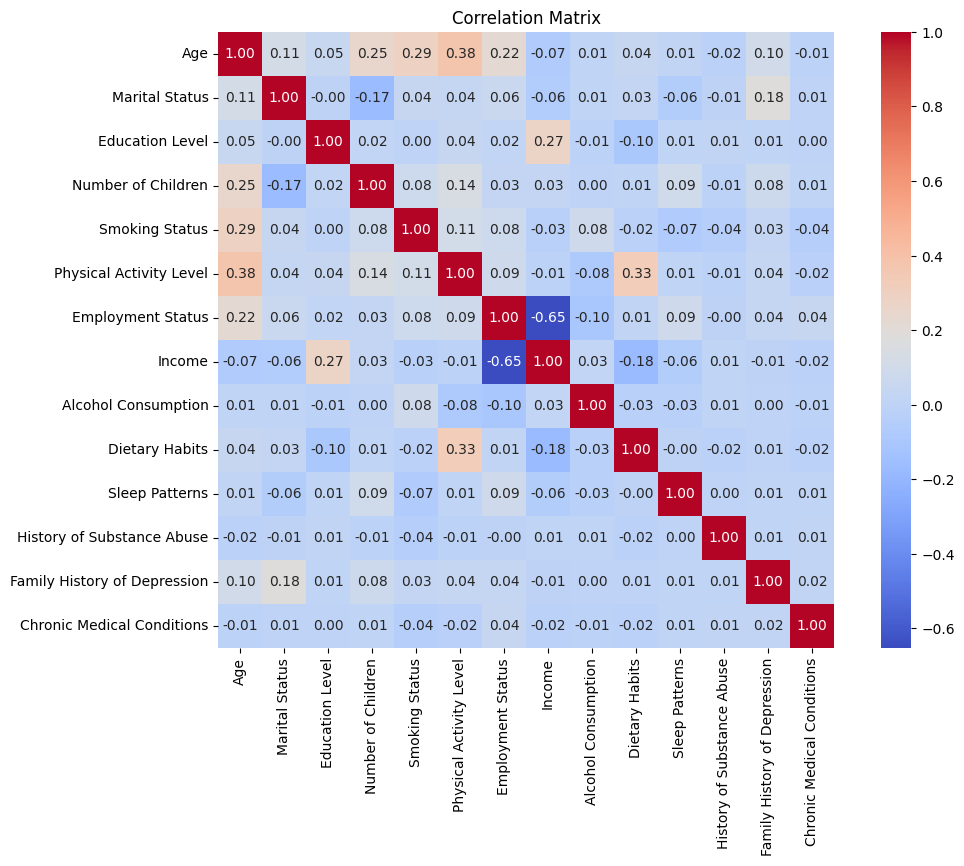

<ipython-input-4-486e83c951bd>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='pastel')


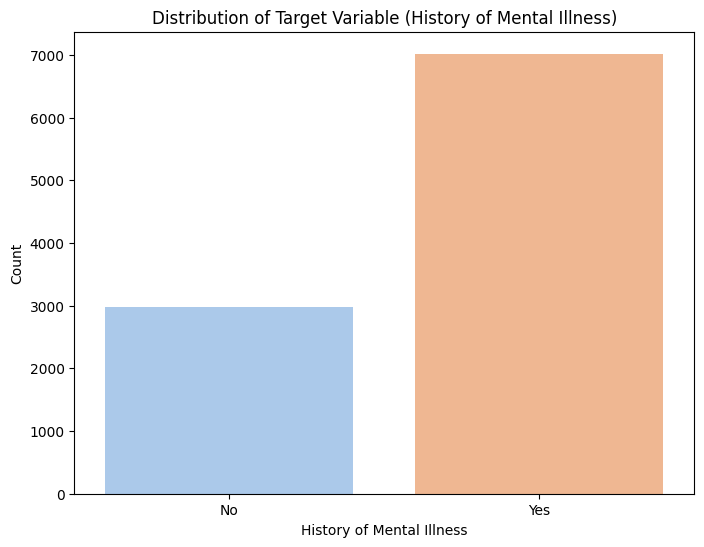

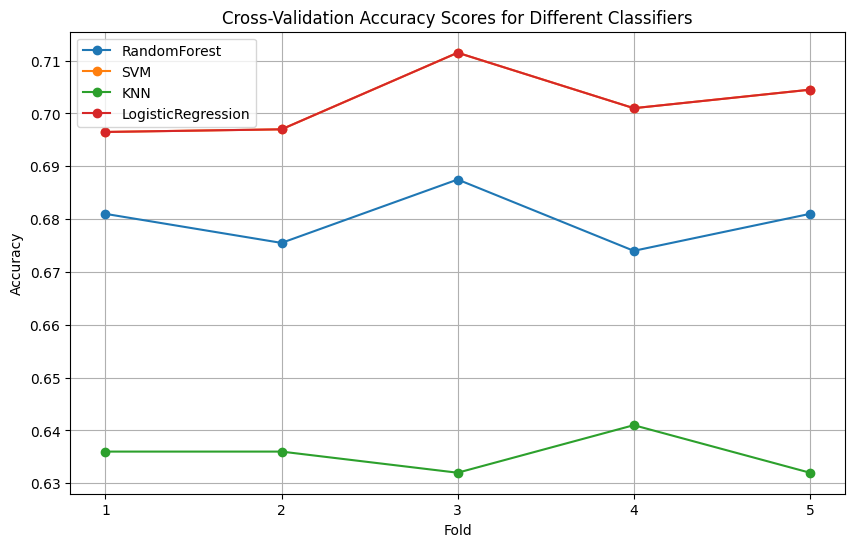

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns  # Import seaborn for visualization
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Import SVC
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load the dataset and take the first 5000 rows
data_path = '/content/drive/MyDrive/StatisticalDataset/Alternate.csv'
data = pd.read_csv(data_path)
data = data.head(10000)

# Impute missing values (numerical columns with mean, categorical with most frequent)
numeric_columns = data.select_dtypes(include=[np.number]).columns
print(numeric_columns)
categorical_columns = data.select_dtypes(exclude=[np.number]).columns.drop(['History of Mental Illness','Name'])

print(categorical_columns)

print(data.columns)

# Create imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers
data[numeric_columns] = num_imputer.fit_transform(data[numeric_columns])
data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])

# Encode categorical columns using Label Encoding2222
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split dataset into features (X) and target (y)
X = data.drop(columns=['History of Mental Illness', 'Name'])  # Replace with your target column name
y = data['History of Mental Illness']#TARGET/Dependent Variable
print(X.columns)
# Save feature names for use during prediction
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

# Define classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=1000)
}

# Perform KFold Cross-Validation to select the best model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_score = 0
best_model_pipeline = None
scores_dict = {}

for name, model in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    mean_score = scores.mean()
    scores_dict[name] = scores  # Store scores for plotting
    print(name, mean_score)
    # Find the best model based on accuracy
    if mean_score > best_score:
        best_score = mean_score
        best_model_pipeline = pipeline

# Train the best model on the full dataset
best_model_pipeline.fit(X, y)

print(best_score)

# Save the best trained model, imputers, encoders, and feature names using joblib
joblib.dump(best_model_pipeline, 'best_model.pkl')
joblib.dump(num_imputer, 'num_imputer.pkl')
joblib.dump(cat_imputer, 'cat_imputer.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(feature_names, 'feature_names.pkl')  # Save feature names for prediction

print("Model and preprocessing components saved.")

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='pastel')
plt.title('Distribution of Target Variable (History of Mental Illness)')
plt.xlabel('History of Mental Illness')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Plotting the cross-validation accuracy scores
plt.figure(figsize=(10, 6))
for name, scores in scores_dict.items():
    plt.plot(range(1, kf.get_n_splits() + 1), scores, marker='o', label=name)

plt.title('Cross-Validation Accuracy Scores for Different Classifiers')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, kf.get_n_splits() + 1))
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Statistical Data Prediction

import pandas as pd
import joblib

# Load the saved model, imputers, encoders, and feature names
pipeline = joblib.load('best_model.pkl')
num_imputer = joblib.load('num_imputer.pkl')
cat_imputer = joblib.load('cat_imputer.pkl')
label_encoders = joblib.load('label_encoders.pkl')
feature_names = joblib.load('feature_names.pkl')  # Load the feature names used during training


def convertIntoDicti(user_data):
    print('Am in ConversionPart')
    print("User Data (Raw):", user_data)

    # Convert the user_data dictionary to a DataFrame
    user_input_df = pd.DataFrame([user_data])
    print([col for col in user_input_df.columns])
    print("User Data (DataFrame):", user_input_df)
    # Identify and print numerical and categorical columns
    numerical_columns = user_input_df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_columns = user_input_df.select_dtypes(exclude=[np.number]).columns.tolist()

    print('Numerical Columns are:', numerical_columns)
    print('Categorical Columns are:', categorical_columns)

    # Ensure the DataFrame has all columns in the feature_names list
    missing_cols = set(feature_names) - set(user_input_df.columns)
    print('The missing columns areeeee: ',missing_cols)
    for col in missing_cols:
        user_input_df[col] = 'None'  # Add missing columns with None values

    # Reorder the DataFrame columns to match the order in feature_names
    user_input_df = user_input_df[feature_names]

    #print("Processed User Input DataFrame:\n", user_input_df.columns)
    return user_input_df

convertIntoDicti({"Age":"19","Marital Status":"Single","Education Level":"High School","Number of Children":"0","Smoking Status":"Current","Physical Activity Level":"Active","Employment Status":"Employed","Income":"10000000","Alcohol Consumption":"High","Dietary Habits":"Healthy","Sleep Patterns":"Fair","History of Substance Abuse":"Yes","Family History of Depression":"No","Chronic Medical Conditions":"No"})

# Define a function to get user input for each feature
def get_user_input():
    user_data = {}

    # Prompt for each feature (excluding 'Name' since it's irrelevant for prediction)

    user_data['Age'] = input("Enter Age: ")
    user_data['Marital Status'] = input("Enter Marital Status: ")
    user_data['Education Level'] = input("Enter Education Level: ")
    user_data['Number of Children'] = input("Enter Number of Children: ")
    user_data['Smoking Status'] = input("Enter Smoking Status: ")
    user_data['Physical Activity Level'] = input("Enter Physical Activity Level: ")
    user_data['Employment Status'] = input("Enter Employment Status: ")
    user_data['Income'] = input("Enter Income: ")
    user_data['Alcohol Consumption'] = input("Enter Alcohol Consumption: ")
    user_data['Dietary Habits'] = input("Enter Dietary Habits: ")
    user_data['Sleep Patterns'] = input("Enter Sleep Patterns: ")
    user_data['History of Substance Abuase'] = input("Enter History of Substance Abuse: ")
    user_data['Family History of Depression'] = input("Enter Family History of Depression: ")
    user_data['Chronic Medical Conditions'] = input("Enter Chronic Medical Conditions: ")

    return convertIntoDicti(user_data)



# Function to preprocess and predict using the loaded model
def preprocess_and_predict(user_input_df):
    print('Am in Preprocess')
    # Convert the numeric columns to numeric type
    numeric_columns = ['Age', 'Number of Children','Income']  # Adjust based on actual numeric columns
    user_input_df[numeric_columns] = user_input_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    print('This part is okay')
    categorical_columns = ['Marital Status', 'Education Level', 'Smoking Status',
                           'Physical Activity Level', 'Employment Status',
                           'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
                           'History of Substance Abuse', 'Family History of Depression',
                           'Chronic Medical Conditions']
    # Impute missing values for numeric columns
    user_input_df[numeric_columns] = num_imputer.transform(user_input_df[numeric_columns])
    print('We are doing good major!')
    # Impute missing values for categorical columns
    user_input_df[categorical_columns] = cat_imputer.transform(user_input_df[categorical_columns])
    print('NomPRoblemoo')
    # Encode categorical columns using the same label encoders used during training

    for col in categorical_columns:
        if col in label_encoders:
            user_input_df[col] = label_encoders[col].transform(user_input_df[col])
        else:
            print(f"Warning: No encoder found for column '{col}'. It will remain unencoded.")
    print('Naahahhaha')
    # Predict using the loaded pipeline (scaling + model)
    predictions = pipeline.predict(user_input_df)
    probabilities = pipeline.predict_proba(user_input_df)
    confidence = max(probabilities[0])  # Get the highest probability (confidence for the predicted class)


    return predictions,confidence


# Main function to collect user input, preprocess it, and make predictions
#if __name__ == "__main__":
    # Get user input for each feature
   # user_input_df = get_user_input()

    # Call the prediction function with the user input data
    #predictions,survey_confidence = preprocess_and_predict(user_input_df)

    # Print predictions
    #print("Predictions for user input data:")
    #print(predictions)
    #result = 'Depressed' if predictions[0]=='Yes' else 'Not Depressed'



FileNotFoundError: [Errno 2] No such file or directory: 'best_model.pkl'

In [ ]:
def check_discrepancies(training_df, testing_df):
    print("Checking for discrepancies...")

    # Step 1: Check for columns with missing values in the testing DataFrame
    missing_values = testing_df.isnull().sum()
    missing_columns = missing_values[missing_values > 0].index.tolist()
    if missing_columns:
        print(f"Columns with missing values in testing data: {missing_columns}")
    else:
        print("No missing values found in testing data.")

    categorical_columns = ['Marital Status', 'Education Level', 'Smoking Status',
                           'Physical Activity Level', 'Employment Status',
                           'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
                           'History of Substance Abuse', 'Family History of Depression',
                           'Chronic Medical Conditions']
    for col in categorical_columns:
        if col in label_encoders:
            testing_df[col] = label_encoders[col].transform(testing_df[col])
        else:
            print(f"Warning: No encoder found for column '{col}'. It will remain unencoded.")
    # Step 2: Check for new/unseen categories in categorical columns
    categorical_columns = training_df.select_dtypes(exclude=[np.number]).columns.tolist()

    print(categorical_columns)
    for col in categorical_columns:
        # Compare categories in training and testing DataFrames
        training_categories = training_df[col].dropna().unique()
        testing_categories = testing_df[col].dropna().unique()
        unseen_categories = set(testing_categories) - set(training_categories)

        if unseen_categories:
            print(f"New/unseen categories in '{col}': {unseen_categories}")
        else:
            print(f"No unseen categories in '{col}'.")

# Example usage


In [ ]:
#Prediction with Video Analysis

import cv2
import numpy as np
from tensorflow.keras.models import load_model
from collections import Counter

# Load the trained emotion classifier model
model = load_model('emotion_classifier.h5')

# Define emotion labels (based on FER2013 dataset classes)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Preprocess each frame from the video
def preprocess_frame(frame):
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Resize the frame to 48x48 (the input size expected by the model)
    resized_frame = cv2.resize(gray_frame, (48, 48))

    # Normalize pixel values between 0 and 1
    normalized_frame = resized_frame / 255.0

    # Reshape the frame to match the input shape expected by the model
    reshaped_frame = np.expand_dims(normalized_frame, axis=(0, -1))

    return reshaped_frame

# Process the video and get emotion predictions for each frame
def process_video(video_path, model):
    # Capture the video
    cap = cv2.VideoCapture(video_path)

    # List to store predictions
    predictions = []

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Preprocess the frame
        preprocessed_frame = preprocess_frame(frame)

        # Predict emotion using the model
        prediction = model.predict(preprocessed_frame)
        print(f'Prediction is {np.argmax(prediction)}')
        # Get the index of the predicted emotion (highest probability)
        predicted_label_idx = np.argmax(prediction)

        confidence = np.max(prediction)

        # Append the predicted emotion label
        predictions.append(emotion_labels[predicted_label_idx])

    # Release the video capture object
    cap.release()

    # Find the most common emotion
    print(predictions)
    most_common_emotion = Counter(predictions).most_common(1)[0][0]
    print('mostt',most_common_emotion)
    return most_common_emotion, predictions,confidence


# Example usage
#video_path = '/content/drive/MyDrive/FinTestVid.mov'  # Replace with your video file path
#most_common_emotion, all_predictions,emotion_confidence = process_video(video_path, model)

#print(f"The most common emotion detected in the video is: {most_common_emotion} and confidence is {emotion_confidence}")


In [ ]:
"""
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score

# Function to take user input and preprocess it for prediction
def get_user_input():
    user_data = {}

    # Categorical input fields
    categorical_inputs = ['Marital Status', 'Education Level', 'Smoking Status',
                          'Physical Activity Level', 'Alcohol Consumption',
                          'Dietary Habits', 'Sleep Patterns']

    for col in categorical_inputs:
        user_data[col] = input(f"Enter {col}: ")

    # Numerical input fields
    user_data['Age'] = float(input("Enter Age: "))
    user_data['Number of Children'] = float(input("Enter Number of Children: "))
    user_data['Income'] = float(input("Enter Income: "))

    return user_data

def preprocess_input(user_data, label_encoders, scaler, feature_order):
    # Convert the input dictionary to a DataFrame
    input_df = pd.DataFrame([user_data])

    # Label encoding the categorical features
    for col in label_encoders:
        input_df[col] = label_encoders[col].transform([user_data[col]])

    # Scaling numerical features
    input_df[['Age', 'Number of Children', 'Income']] = scaler.transform(input_df[['Age', 'Number of Children', 'Income']])

    # Reorder the features to match the order used in the training data
    input_df = input_df[feature_order]

    return input_df

def test_model(model, user_data, label_encoders, scaler, feature_order):
    # Preprocess user input
    processed_input = preprocess_input(user_data, label_encoders, scaler, feature_order)

    # Predict the result
    prediction = model.predict(processed_input)

    # Predict probabilities if available
    if hasattr(model, "predict_proba"):
        probabilities = model.predict_proba(processed_input)
        confidence = probabilities[0][1]  # Get probability of the positive class
    else:
        confidence = None  # In case the model does not support predict_proba

    # Output result
    result = 'Depressed' if prediction[0] == 1 else 'Not Depressed'
    return result, confidence

# Sample code to run the testing module
if __name__ == "__main__":
    # Get user input
    user_input = get_user_input()

    # Load trained model and other preprocessing objects
    best_model = joblib.load('BestModel.joblib')
    label_encoders = joblib.load('label_encoders.joblib')
    scaler = joblib.load('scaler.joblib')

    # Load feature order (this should be saved during training)
    feature_order = joblib.load('feature_order.joblib')

    # Test the model with user input
    result, confidence = test_model(best_model, user_input, label_encoders, scaler, feature_order)

    # Output results
    print(f"Prediction: {result}")
    if confidence is not None:
        print(f"Confidence: {confidence}")
  """


Enter Age: 21
Enter Gender: Male
Enter Employment Status: Employed
Enter Income: 100000
Enter Alcohol Consumption: Low
Enter Education Level: PhD
Enter Chronic Medical Conditions: No


NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#Final Decision Module

def make_final_decision(emotion, depression_prediction,survey_confidence, emotion_confidence):
    survey_weight = 0.9
    emotion_weight = 0.5

    # Emotion logic: Assume 'Angry', 'Sad', etc., suggest depression
    emotion_depressed = "YES" if emotion in ['Angry', 'Sad', 'Fear'] else "NO"

    if(emotion_depressed=='YES' and depression_prediction=="Depressed"):
        return "Depressed"
    elif(emotion_depressed=='NO' and depression_prediction=='NOT Depressed'):
        return "Not Depressed"
    else:
        if(survey_weight*survey_confidence>=emotion_weight*emotion_confidence):
            return depression_prediction
        else:
            return "YES" if emotion_depressed=='YES' else 'NO'

# Final decision based on emotion and survey model
#final_decision = make_final_decision(most_common_emotion, result,survey_confidence,emotion_confidence)
#print("Final Decision:", final_decision)


In [ ]:
from flask import *
from flask_cors import CORS
import os
app = Flask(__name__, template_folder='/content/drive/MyDrive/templates',static_folder='/content/drive/MyDrive/FinPro/Static')
CORS(app)

uploadFolder = './uploads'
os.makedirs(uploadFolder,exist_ok=True)

@app.route('/', methods=['GET'])
def index():
    print('hi')
    return render_template('index.html')

@app.route('/formpage',methods=['GET','POST'])
def formPage():
  return render_template('formPage.html')

@app.route('/formsubmit',methods=['POST'])
def formSubmit():
    print('hi')
    video = request.files.get('video')
    video_path = os.path.join(uploadFolder, video.filename)
    video.save(video_path)
    formdata = json.loads(request.form.get('StatisticalData'))

    print(formdata['Age'],'hello')
    formdata['Age'] = int(formdata['Age'])
    formdata['Number of Children'] = int(formdata['Number of Children'])
    formdata['Income']=int(formdata['Income'])
    mostcommon,preds, confidence_video =process_video(video_path, model)
    dataframe = convertIntoDicti(formdata)
    predictions,survey_confidence = preprocess_and_predict(dataframe)
    print("Predictions for user input data:")
    print(predictions)
    resultStatisitcal = 'Depressed' if predictions[0]=='Yes' else 'Not Depressed'

    result= make_final_decision(mostcommon,resultStatisitcal,survey_confidence, confidence_video)


    return render_template('AnswerTemplate.html',result=result)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 04:59:17] "GET / HTTP/1.1" 200 -


hi


INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 04:59:20] "GET /Static/styles.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 04:59:22] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 04:59:24] "GET /formpage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 04:59:27] "GET /Static/styles.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 04:59:29] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 04:59:31] "POST /formsubmit HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 04:59:31] "POST /formsubmit HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 04:59:40] "POST /formsubmit HTTP/1.1" 400 -


hi


INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 05:00:35] "POST /formsubmit HTTP/1.1" 400 -


hi


INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 05:02:11] "POST /formsubmit HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 05:02:49] "POST /formsubmit HTTP/1.1" 400 -


hi
hi
hi
hi


INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 05:05:50] "POST /formsubmit HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 05:05:56] "POST /formsubmit HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 05:05:57] "POST /formsubmit HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [26/Oct/2024 05:05:57] "POST /formsubmit HTTP/1.1" 400 -


In [ ]:
!pip install flask-cors

In [ ]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://3x6ajzp707e-496ff2e9c6d22116-5000-colab.googleusercontent.com/
